In [0]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
#import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing and visulaising

In [2]:
data = pd.read_csv("Cumlative/covid_19_india.csv")
data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...
2163,2164,21/05/20,8:00 AM,Tripura,-,-,133.0,0.0,173
2164,2165,21/05/20,8:00 AM,Uttarakhand,-,-,53.0,1.0,122
2165,2166,21/05/20,8:00 AM,Uttar Pradesh,-,-,3066.0,127.0,5175
2166,2167,21/05/20,8:00 AM,West Bengal,-,-,1136.0,253.0,3103


In [3]:
data1 = data.copy()
data1 = data1.drop(['Time','ConfirmedIndianNational','ConfirmedForeignNational','Sno'], axis=1)
data1 = data1.fillna(0)
data1

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0.0,0.0,1
1,31/01/20,Kerala,0.0,0.0,1
2,01/02/20,Kerala,0.0,0.0,2
3,02/02/20,Kerala,0.0,0.0,3
4,03/02/20,Kerala,0.0,0.0,3
...,...,...,...,...,...
2163,21/05/20,Tripura,133.0,0.0,173
2164,21/05/20,Uttarakhand,53.0,1.0,122
2165,21/05/20,Uttar Pradesh,3066.0,127.0,5175
2166,21/05/20,West Bengal,1136.0,253.0,3103


In [4]:
#Changing date format to year/month/date


data1['Date'] = pd.to_datetime(data1['Date'], format = '%d/%m/%y')
data1['Date'] = data1['Date'].dt.strftime('%y/%m/%d')
data1.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
2163,20/05/21,Tripura,133.0,0.0,173
2164,20/05/21,Uttarakhand,53.0,1.0,122
2165,20/05/21,Uttar Pradesh,3066.0,127.0,5175
2166,20/05/21,West Bengal,1136.0,253.0,3103
2167,20/05/21,Cases being reassigned to states,0.0,0.0,1403


In [5]:
#data1.drop(data1.tail(1).index, inplace = True)
data1 = data1.groupby(['Date'])[['Confirmed','Cured','Deaths']].sum()
data1

,Confirmed,Cured,Deaths
Date,,,
20/01/30,1,0.0,0.0
20/01/31,1,0.0,0.0
20/02/01,2,0.0,0.0
20/02/02,3,0.0,0.0
20/02/03,3,0.0,0.0
...,...,...,...
20/05/17,90637,34109.0,2872.0
20/05/18,95759,36824.0,3029.0
20/05/19,100325,39174.0,3163.0


In [6]:
confirmed = data1.groupby('Date').sum()['Confirmed'].reset_index()
deaths = data1.groupby('Date').sum()['Deaths'].reset_index()
recovered = data1.groupby('Date').sum()['Cured'].reset_index()
confirmed.tail()

,Date,Confirmed
108,20/05/17,90637
109,20/05/18,95759
110,20/05/19,100325
111,20/05/20,106750
112,20/05/21,112359


In [7]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Cured'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='India NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.update_layout(
    autosize=False,
    width=1500,
    height=500,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
        pad=0
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

#Forecasting of Confirmed Cases in Country

## (1) Using Prophet

In [0]:
from fbprophet import Prophet

In [0]:
confirmed = data1.groupby('Date').sum()['Confirmed'].reset_index()
deaths = data1.groupby('Date').sum()['Deaths'].reset_index()

In [10]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'], format = '%y/%m/%d')
confirmed.tail()

,ds,y
108,2020-05-17,90637
109,2020-05-18,95759
110,2020-05-19,100325
111,2020-05-20,106750
112,2020-05-21,112359


In [11]:
m = Prophet(interval_width=1.0)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
115,2020-05-24
116,2020-05-25
117,2020-05-26
118,2020-05-27
119,2020-05-28


In [0]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)


In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,174.235250,-5039.169303,5076.613553
1,2020-01-31,-364.575258,-5570.599479,5977.026147
2,2020-02-01,-414.345431,-5729.996798,5645.846942
3,2020-02-02,-297.489481,-6118.084706,5402.789846
4,2020-02-03,-105.008021,-4880.955429,5620.623766
...,...,...,...,...
115,2020-05-24,113564.870551,108360.266024,119268.251374
116,2020-05-25,117135.912197,111775.770829,122810.037716
117,2020-05-26,120718.737010,115181.352384,126511.932838
118,2020-05-27,124180.092778,117704.224153,131369.464101


In [0]:
#Extracting data for present date
prophet_con = forecast[['ds','yhat','yhat_lower','yhat_upper']].iloc[114]

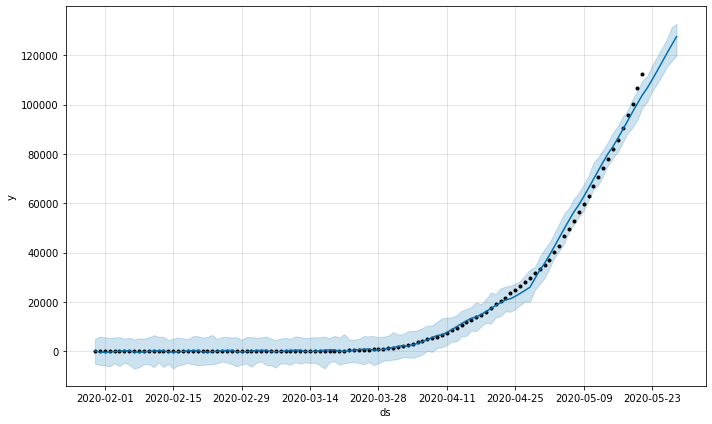

In [15]:
confirmed_forecast_plot = m.plot(forecast)

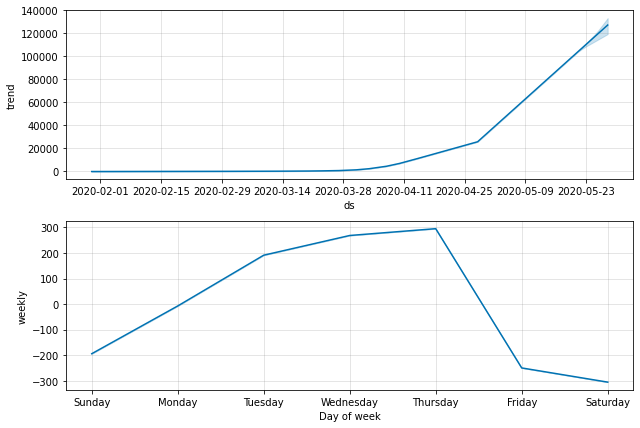

In [16]:
confirmed_forecast_plot =m.plot_components(forecast)

## (2) Using SARIMAX

In [0]:
#pip uninstall statsmodels

In [0]:
#pip install numpy scipy patsy pandas

In [0]:
#pip install statsmodels

In [0]:
#pip install pmdarima

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima 

In [22]:
confirmed = confirmed.set_index("ds")
confirmed.head()

,y
ds,
2020-01-30,1
2020-01-31,1
2020-02-01,2
2020-02-02,3
2020-02-03,3


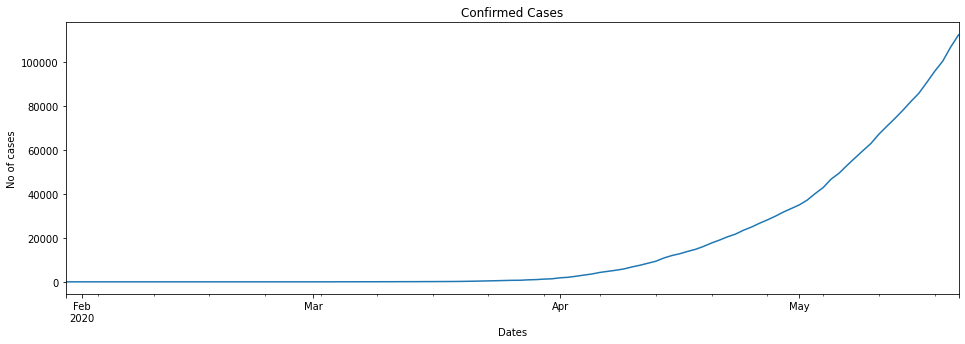

In [23]:
#Basic Data Plot
#confirmed.index.freq = 'MS'
ax = confirmed['y'].plot(figsize = (16,5), title = "Confirmed Cases")
ax.set(xlabel='Dates', ylabel='No of cases');

In [24]:
#Using grid search for finding order and seasonal order in SARIMAX

%time
model = auto_arima(confirmed, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(confirmed)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.48 µs
Performing stepwise search to minimize aic
Fit ARIMA(2,2,2)x(0,0,0,0) [intercept=True]; AIC=1570.924, BIC=1587.181, Time=0.420 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=1618.859, BIC=1624.278, Time=0.023 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=1581.091, BIC=1589.219, Time=0.035 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=1589.877, BIC=1598.005, Time=0.112 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=False]; AIC=1619.161, BIC=1621.871, Time=0.012 seconds
Fit ARIMA(1,2,2)x(0,0,0,0) [intercept=True]; AIC=1577.122, BIC=1590.670, Time=0.295 seconds
Fit ARIMA(2,2,1)x(0,0,0,0) [intercept=True]; AIC=1583.135, BIC=1596.682, Time=0.342 seconds
Fit ARIMA(3,2,2)x(0,0,0,0) [intercept=True]; AIC=1569.549, BIC=1588.515, Time=0.594 seconds
Fit ARIMA(3,2,1)x(0,0,0,0) [intercept=True]; AIC=1575.325, BIC=1591.582, Time=0.556 seconds
Fit ARIMA(4,2,2)x(0,0,0,0) [intercept=True]; AIC=1568.193, BIC=1

ARIMA(maxiter=50, method='lbfgs', order=(4, 2, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [25]:
'''#order and seasonsal order from graph
arima_model = SARIMAX(confirmed['y'], order = (5,1,0), seasonal_order = (1,1,0,2))
arima_result = arima_model.fit()
arima_result.summary()'''

"#order and seasonsal order from graph\narima_model = SARIMAX(confirmed['y'], order = (5,1,0), seasonal_order = (1,1,0,2))\narima_result = arima_model.fit()\narima_result.summary()"

In [26]:
#order and seasonsal order from AIC
arima_model = SARIMAX(confirmed['y'], order = (4,2,3), seasonal_order = (0,0,0,7))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  113
Model:               SARIMAX(4, 2, 3)   Log Likelihood                -774.735
Date:                Sat, 23 May 2020   AIC                           1565.470
Time:                        18:58:37   BIC                           1587.146
Sample:                    01-30-2020   HQIC                          1574.263
                         - 05-21-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4619      0.231     -2.003      0.045      -0.914      -0.010
ar.L2         -0.0165      0.142     -0.116      0.907      -0.295       0.262
ar.L3          0.9340      0.103      9.080      0.000       0.732       1.136
ar.L4          0.5151      0.175      2.942      0.003       0.172       0.858
ma.L1         -0.1756      0.272     -0.647      0.518      -0.708       0.357
ma.L2          0.1525      0.210      0.725      0.468      -0.260       0.565
ma.L3         -0.7416      0.169     -4.387      0.000      -1.073      -0.410
sigma2      7.699e+04   8242.884      9.340      0.000    6.08e+04    9.31e+04
===================================================================================
Ljung-Box (Q):                       43.29   Jarque-Bera (JB):               148.03
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):            8871.45   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
#Prediction
arima_pred = arima_result.predict(start = len(confirmed), end = len(confirmed)+7, typ="levels").rename("ARIMA Predictions")
arima_pred

2020-05-22    118247.517457
2020-05-23    124818.055085
2020-05-24    131230.159428
2020-05-25    137544.946174
2020-05-26    144688.299085
2020-05-27    151653.850974
2020-05-28    158515.317096
2020-05-29    166151.581914
Freq: D, Name: ARIMA Predictions, dtype: float64

In [28]:
arima_pred = arima_pred.astype(int)
arima_pred

2020-05-22    118247
2020-05-23    124818
2020-05-24    131230
2020-05-25    137544
2020-05-26    144688
2020-05-27    151653
2020-05-28    158515
2020-05-29    166151
Freq: D, Name: ARIMA Predictions, dtype: int64

In [0]:
#Extracting data based on present date

sarimax_con = arima_pred.iloc[1]

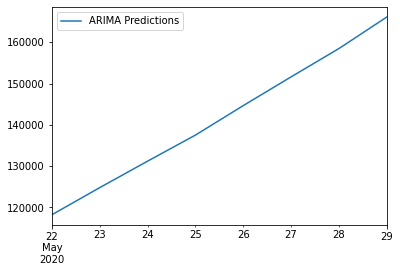

In [30]:
#test_data['y'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

#Forecasting of recovered cases
## (1) using Prophet

In [31]:
recovered = data1.groupby('Date').sum()['Cured'].reset_index()
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'], format = '%y/%m/%d')
recovered.tail()

,ds,y
108,2020-05-17,34109.0
109,2020-05-18,36824.0
110,2020-05-19,39174.0
111,2020-05-20,42298.0
112,2020-05-21,45300.0


In [32]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
115,2020-05-24
116,2020-05-25
117,2020-05-26
118,2020-05-27
119,2020-05-28


In [33]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,115.591904,-2457.654642,3098.922996
1,2020-01-31,-352.869508,-3243.767800,2456.268217
2,2020-02-01,-342.801619,-3105.116621,2465.611548
3,2020-02-02,-188.297214,-2992.028853,2632.308162
4,2020-02-03,-107.917304,-2863.026110,2665.399489
...,...,...,...,...
115,2020-05-24,42008.209285,39230.198891,44401.845128
116,2020-05-25,43491.440567,40842.214350,46132.422249
117,2020-05-26,44990.572013,42176.766171,47871.681951
118,2020-05-27,46497.817617,43607.445459,49278.059990


In [0]:
# Exarcting data based on present date

prophet_rec = forecast[['ds','yhat','yhat_lower','yhat_upper']].iloc[114]

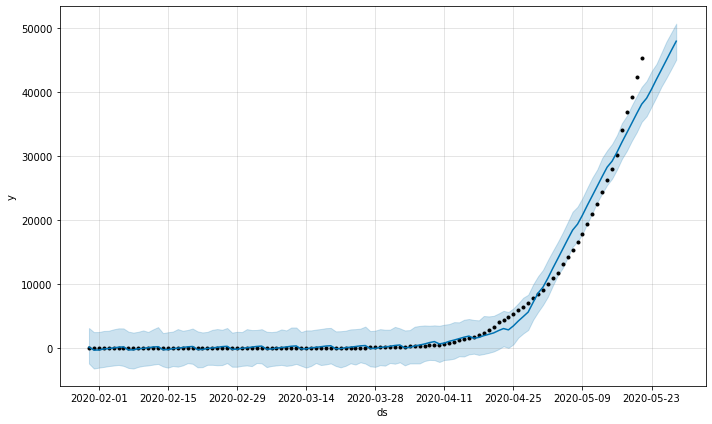

In [35]:
recovered_forecast_plot = m.plot(forecast)

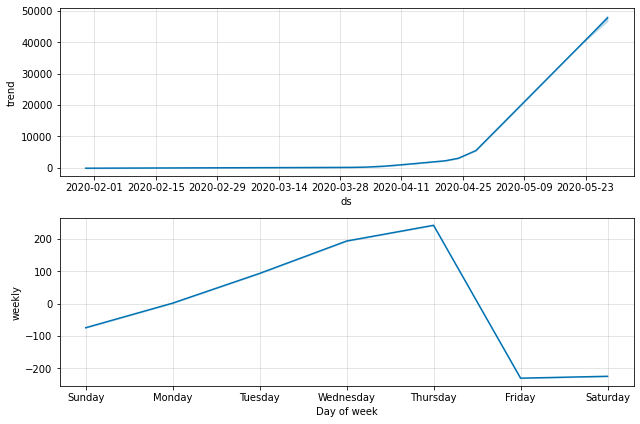

In [36]:
recovered_forecast_plot = m.plot_components(forecast)

## Using SARIMAX for recorvery forecast

In [37]:
recovered = recovered.set_index("ds")
recovered.head()

,y
ds,
2020-01-30,0.0
2020-01-31,0.0
2020-02-01,0.0
2020-02-02,0.0
2020-02-03,0.0


In [38]:
#Using grid search for finding order and seasonal order in SARIMAX

%time
model = auto_arima(recovered, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(recovered)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.87 µs
Performing stepwise search to minimize aic
Fit ARIMA(2,2,2)x(0,0,0,0) [intercept=True]; AIC=1506.946, BIC=1523.204, Time=0.506 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=1542.728, BIC=1548.147, Time=0.015 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=1535.730, BIC=1543.859, Time=0.072 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=1523.049, BIC=1531.178, Time=0.109 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=False]; AIC=1542.043, BIC=1544.753, Time=0.014 seconds
Fit ARIMA(1,2,2)x(0,0,0,0) [intercept=True]; AIC=1520.382, BIC=1533.930, Time=0.261 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,2,1)x(0,0,0,0) [intercept=True]; AIC=1510.439, BIC=1523.987, Time=0.252 seconds
Fit ARIMA(3,2,2)x(0,0,0,0) [intercept=True]; AIC=1508.977, BIC=1527.944, Time=0.531 se

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [39]:
#order and seasonsal order from AIC
arima_model = SARIMAX(recovered['y'], order = (1,2,3), seasonal_order = (0,0,0,0))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  113
Model:               SARIMAX(1, 2, 3)   Log Likelihood                -746.855
Date:                Sat, 23 May 2020   AIC                           1503.710
Time:                        18:58:46   BIC                           1517.258
Sample:                    01-30-2020   HQIC                          1509.206
                         - 05-21-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4486      0.108      4.148      0.000       0.237       0.661
ma.L1         -1.0431      6.308     -0.165      0.869     -13.406      11.320
ma.L2          0.0299      3.993      0.007      0.994      -7.795       7.855
ma.L3          0.5928      4.547      0.130      0.896      -8.319       9.504
sigma2      3.841e+04   2.97e+05      0.129      0.897   -5.44e+05    6.21e+05
===================================================================================
Ljung-Box (Q):                       20.24   Jarque-Bera (JB):              5830.18
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):          290680.78   Skew:                             4.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
#Prediction
arima_pred = arima_result.predict(start = len(recovered), end = len(recovered)+7, typ="levels").rename("ARIMA Predictions")
arima_pred

2020-05-22    48637.532806
2020-05-23    52022.534835
2020-05-24    55148.441665
2020-05-25    58158.117270
2020-05-26    61115.651047
2020-05-27    64049.793774
2020-05-28    66973.443176
2020-05-29    69892.385227
Freq: D, Name: ARIMA Predictions, dtype: float64

In [41]:
arima_pred = arima_pred.astype(int)
arima_pred

2020-05-22    48637
2020-05-23    52022
2020-05-24    55148
2020-05-25    58158
2020-05-26    61115
2020-05-27    64049
2020-05-28    66973
2020-05-29    69892
Freq: D, Name: ARIMA Predictions, dtype: int64

In [0]:
#Exctracting data baed on present date data

sarimax_rec = arima_pred.iloc[1]

#Analysing State Wise Cases

In [0]:
india_data = pd.read_csv("Daily/23-05-2020.csv")

In [44]:
df_india = india_data.copy()
df_india.drop(['S. No.'],axis=1,inplace=True)
df_india.head()

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**
0,Andaman and Nicobar Islands,33.0,33.0,0
1,Andhra Pradesh,2709.0,1763.0,55
2,Arunachal Pradesh,1.0,1.0,0
3,Assam,259.0,54.0,4
4,Bihar,2177.0,629.0,11


In [0]:
df_india.drop(df_india.tail(4).index,inplace=True)

In [46]:
df_india.tail()

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**
30,Uttarakhand,153.0,56.0,1
31,Uttar Pradesh,5735.0,3238.0,152
32,West Bengal,3332.0,1221.0,265
33,Cases being reassigned to states,1899.0,NaN,NaN
34,Total#,125101.0,51784.0,3720


In [0]:
df_india = df_india.fillna(0)
df_india.at[24,'Deaths**'] = 0

In [48]:
df_india.tail()

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**
30,Uttarakhand,153.0,56.0,1
31,Uttar Pradesh,5735.0,3238.0,152
32,West Bengal,3332.0,1221.0,265
33,Cases being reassigned to states,1899.0,0.0,0
34,Total#,125101.0,51784.0,3720


In [0]:
val = df_india.tail(1)

In [0]:
import numpy as np
df_india['Total Confirmed cases*'] = df_india['Total Confirmed cases*'].astype(np.int64)
df_india['Cured/Discharged/Migrated'] = df_india['Cured/Discharged/Migrated'].astype(np.int64)
df_india['Deaths**'] = df_india['Deaths**'].astype(np.int64)

In [0]:
(df_india.head(33)).style.background_gradient(cmap='Blues')
india = (df_india.head(33))

In [52]:
india.style.background_gradient(cmap='Blues')

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**
0,Andaman and Nicobar Islands,33,33,0
1,Andhra Pradesh,2709,1763,55
2,Arunachal Pradesh,1,1,0
3,Assam,259,54,4
4,Bihar,2177,629,11
5,Chandigarh,218,178,3
6,Chhattisgarh,172,62,0
7,Dadar Nagar Haveli,1,0,0
8,Delhi,12319,5897,208
9,Goa,54,16,0


In [53]:
india['total active'] = india['Total Confirmed cases*'] - india['Cured/Discharged/Migrated'] + india['Deaths**']
Tot_Cases = india.groupby('Name of State / UT')['total active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

,total active
Name of State / UT,
Maharashtra,33516
Gujarat,8190
Tamil Nadu,7723
Delhi,6630
Madhya Pradesh,3353
Rajasthan,2967
Uttar Pradesh,2649
West Bengal,2376
Bihar,1559


#Comaprison of Predicted vs Real values

In [54]:
val

,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**
34,Total#,125101.0,51784.0,3720


In [55]:
print("Confirmed Cases predicted by Prophet model",prophet_con[['yhat']],'\n \n')
print("Lower Boundary  of Confirmed Cases predicted by Prophet model",prophet_con[['yhat_lower']],'\n \n')
print("Upper Boundary of Confirmed Cases predicted by Prophet model",prophet_con[['yhat_upper']],'\n \n')
print("Confirmed cases predicted by SARIMAX model",sarimax_con, '\n \n')

Confirmed Cases predicted by Prophet model yhat    110069
Name: 114, dtype: object 
 

Lower Boundary  of Confirmed Cases predicted by Prophet model yhat_lower    105457
Name: 114, dtype: object 
 

Upper Boundary of Confirmed Cases predicted by Prophet model yhat_upper    116003
Name: 114, dtype: object 
 

Confirmed cases predicted by SARIMAX model 124818 
 



In [56]:
print("Recovered Cases predicted by Prophet model",prophet_rec[['yhat']],'\n \n')
print("Lower Boundary  of Recovered Cases predicted by Prophet model",prophet_rec[['yhat_lower']],'\n \n')
print("Upper Boundary of Recovered Cases predicted by Prophet model",prophet_rec[['yhat_upper']],'\n \n')
print("Recovered cases predicted by SARIMAX model",sarimax_rec, '\n \n')

Recovered Cases predicted by Prophet model yhat    40450.9
Name: 114, dtype: object 
 

Lower Boundary  of Recovered Cases predicted by Prophet model yhat_lower    37721.8
Name: 114, dtype: object 
 

Upper Boundary of Recovered Cases predicted by Prophet model yhat_upper    43258
Name: 114, dtype: object 
 

Recovered cases predicted by SARIMAX model 52022 
 



# Conculsion And Discussion

From the above results we find that SARIMAX is able to predict much better confirmed cases and recovery cases compared to prophet. It is beacuse  an ARIMA model produces forecasts based upon prior values in the time series (AR terms) and the errors made by previous predictions (MA terms). This typically allows the model to rapidly adjust for sudden changes in trend, resulting in more accurate forecasts.